
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---

# Trabajo práctico entregable - Parte 2

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn

seaborn.set_context('talk')

!pip install ptitprince
import ptitprince as pt

     |████████████████████████████████| 61kB 3.3MB/s 
  Created wheel for ptitprince: filename=ptitprince-0.2.5-cp37-none-any.whl size=8429 sha256=01a0c211f2c3bd628153b63ae12eb7984b33c7d7d45a6dd228e175f36c5ff74a
  Stored in directory: /root/.cache/pip/wheels/fb/c1/75/2ef8da161053bdf8e03f9a360f426accd4fac1ddf7f6ed0029
Successfully built ptitprince


## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.0,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [ ]:
df[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                ...                     
                             count          mean  ...       75%        max
profile_gender                                    ...                     
Hombre                      4944.0  98836.063558  ...  110000.0  2080000.0
Mujer                        908.0  73501.414465  ...   92000.0   800000.0
Otros                         31.0  95441.354839  ...  117500.0   380000.0

[3 rows x 8 columns]

In [ ]:
df[df.salary_monthly_NETO > 1000]\
  [['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                 ...                     
                             count           mean  ...       75%        max
profile_gender                                     ...                     
Hombre                      4815.0  101481.624343  ...  110000.0  2080000.0
Mujer                        863.0   77328.913778  ...   93000.0   800000.0
Otros                         28.0  105660.714286  ...  122750.0   380000.0

[3 rows x 8 columns]

In [ ]:
alpha = 0.05

In [ ]:
is_man = df.profile_gender == 'Hombre'
df.profile_gender=np.where(is_man,"groupA","groupB")
groupA = df[(df.salary_monthly_NETO > 1000) & is_man].salary_monthly_NETO
groupB = df[(df.salary_monthly_NETO > 1000) & ~is_man].salary_monthly_NETO

## Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros(diferencia de las medias entre el grupoA y grupoB). 
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

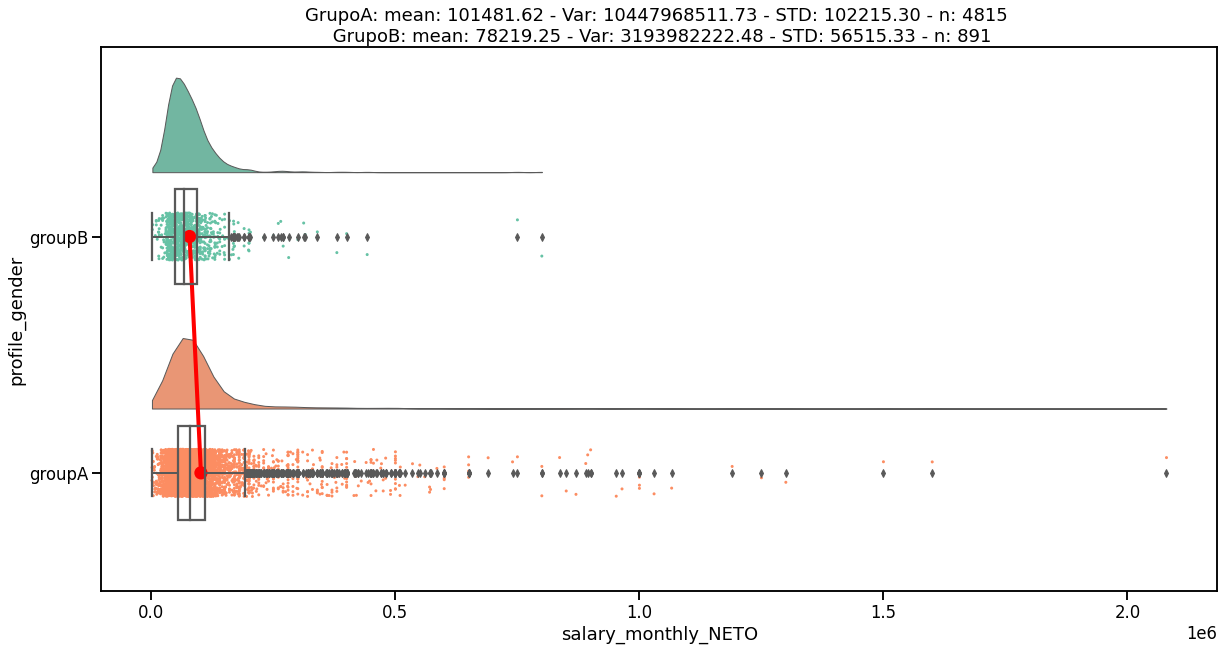

In [ ]:
import ptitprince as pt

plt.figure(figsize=(20,10))

ax = pt.RainCloud(x = 'profile_gender', y = 'salary_monthly_NETO',
                  data = df[df.salary_monthly_NETO > 1000], 
                  width_viol = .8,pointplot = True,
                  width_box = .4,
                  orient='h',
                  move = .0)

plt.title("GrupoA: mean: {:.2f} - Var: {:.2f} - STD: {:.2f} - n: {:.0f} \n GrupoB: mean: {:.2f} - Var: {:.2f} - STD: {:.2f} - n: {:.0f}".format(groupA.mean(),groupA.var(),groupA.std(),len(groupA),
                                                                               groupB.mean(),groupB.var(),groupB.std(),len(groupB)))
plt.show()

En el gráfico de arriba se puede observar una clara diferencia entre la media de ambas distribuciones, siendo el grupoA(hombres) el que tiene un salario medio mayor con respecto al grupo B. Asimismo se puede ver la dispersión de los datos, detectandose una asimetría hacia la derecha en ambas distribuciones. Esto puede ser un factor importante a la hora de determinar la normalidad de la distribución, requisito importante en los tests de hipótesis. Otro aspecto a considerar es la cantidad de observaciones, siendo el grupoA el que tiene un número mayor de datos.
Previo a calcular el estimador puntual y el intervalo de confianza, también determinamos las medidas de centralización (media), dispersión (varianza y desvio estándar) y el tamaño muestral para cada uno de los grupos.

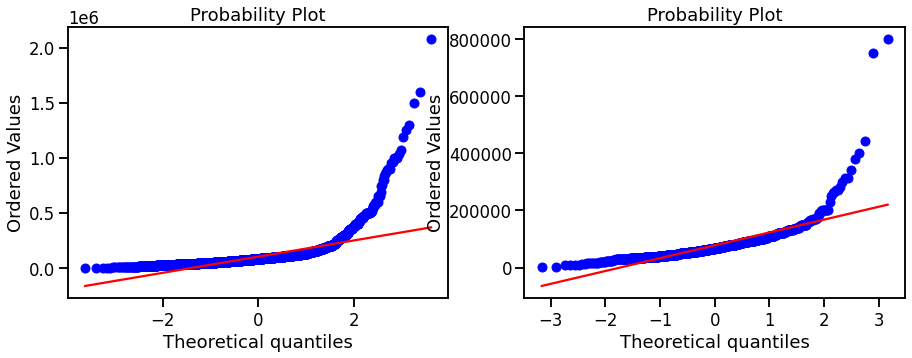

In [ ]:
import numpy as np 
import pylab 
import scipy.stats as stats

fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
 
stats.probplot(groupA, dist="norm", plot=axs[0])
stats.probplot(groupB, dist="norm", plot=axs[1])
pylab.show()


Si la distribución de los datos de ambos grupos fuera normal, los puntos deberían caer cerca de la línea recta. En este caso, los puntos en las gráficas de probabilidad no coinciden en toda su extensión con la línea recta, observandose nuevamente la asimetría hacia la derecha de los datos. Por lo tanto, los datos no parecen ajustarse a una distribución normal.

El estimador puntual corresponde a la diferencia de medias

In [ ]:
dif_medias=groupA.mean()-groupB.mean()
print("Estimador: {:.2f}".format(dif_medias))

Estimador: 23262.37


Para calcular el intervalo de confianza empleamos el método de Welch (t de student con k grados de libertad) ya que las varianzas de ambos grupos son diferentes

In [ ]:
std_A=groupA.std()
std_B=groupB.std()

n_A=len(groupA)
n_B=len(groupB)

# Cálculo de los grados de libertad (grados_lib)
grados_lib= (std_A**2/n_A + std_B**2/n_B)**2/((std_A**2/n_A)**2/(n_A-1) + (std_B**2/n_B)**2/(n_B-1))
grados_lib

2148.0505828160885

Intervalo de confianza

In [ ]:
scipy.stats.t.interval(alpha= 0.95, df=grados_lib, loc=dif_medias, scale= np.sqrt(std_A**2/n_A + std_B**2/n_B))

(18558.016394102277, 27966.730405734183)

Cálculo del intervalo de confianza usando el estadístico t

In [ ]:
alpha=0.05
t=scipy.stats.t.ppf(1-alpha/2, grados_lib)
t

1.9610689798249947

In [ ]:
#Límite inferior
dif_medias-t* np.sqrt(std_A**2/n_A+std_B**2/n_B)

18558.016394102277

In [ ]:
#Límite superior
dif_medias+t* np.sqrt(std_A**2/n_A+std_B**2/n_B)

27966.730405734183

El intervalo de confianza, al igual que el test de hipótesis, nos permite determinar si existen diferencias significativas entre las medias de diferentes poblaciones. En este caso puntual, podemos observar que la diferencia de medias entre el salario del grupoA y el grupoB se encuentra entre valores que no incluyen al cero, lo que nos permite asegurar con una probabilidad del 95% que las medias son distintas. Por otro lado, debido a que el intervalo de confianza es positivo, podemos decir que la media del salario neto del grupoA es mayor a la media del salario neto del grupoB.  

## Ejercicio 2: Test de hipótesis



### 2.1 Formalización

Describir formalmente los distintos compenentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

**Hipótesis Nula**

$H_0=...$

**Estadístico (Pivote)**
  * Identificar el estadístico
  * Escribir qué distribución tiene bajo $H_0$


# Componentes de un test de hipótesis

**Hipótesis Nula** (las medias poblacionales son iguales)

$H_0= \mu_1\ =\mu_2$

**Hipótesis Alternativa** (las medias poblacionales son diferentes)

$H_1= \mu_1\neq\mu_2$






**Estadístico (Pivote)**

$T=\frac{(\bar{X}\ -\bar{Y})-(\mu_1-\mu_2)}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$

Bajo hipótesis nula el estadístico T tiene distribución t de Student

### 2.2 P-valor

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.
3. Los dos grupos de nuestra muestra tienen tamaños muy distintos. ¿Esto afecta al tests?

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

In [ ]:
scipy.stats.ttest_ind(groupA, groupB, equal_var = False)

Ttest_indResult(statistic=9.697205976350673, pvalue=8.605197322133209e-22)

Debido a que los tamaños muestrales y las varianzas de ambos grupos son diferentes, aplicamos el test t de Welch. Los resultados arrojaron un p-valor menor a 0,05 por lo cual rechazamos la hipótesis nula de que las medias son iguales. Es decir, existen diferencias significativas entre el salario neto del grupoA y del grupoB. Asimismo, debido a que el estadístico es positivo, podemos decir que la media del salario neto del grupoA es mayor a la del grupoB. 

El test t de Welch también contempla tamaños muestrales diferentes entre grupos por lo que no sería afectado por esta desigualdad.

### [Opcional] 2.3 Potencia del test

Nuestra muestra, ¿era lo suficientemente grande para detectar si existe o no una diferencia entre los grupos?

1. Utilice la función `tt_ind_solve_power` para calcular el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9 y 0.95, asumiendo una significancia estadística de 0.05.
2. ¿Cómo intepretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general? ¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?

[Documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)

NOTA: este análisis debería hacerse ANTES de recolectar los datos.

In [ ]:
from statsmodels.stats.power import tt_ind_solve_power

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
effect_size = (groupA.mean() - groupB.mean()) / groupB.std()
# nobs1=None  - What we want to know
alpha = 0.05
ratio = len(groupB) / len(groupA)

In [ ]:
tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=0.80, ratio=ratio)

298.3073379956589

In [ ]:
tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=0.90, ratio=ratio)

398.79610014029686

In [ ]:
tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=0.95, ratio=ratio)

492.8117730249087

In [ ]:
effect_size = (groupB.mean() - groupA.mean()) / groupA.std()
# nobs1=None  - What we want to know
alpha = 0.05
ratio = len(groupA) / len(groupB)

In [ ]:
tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=0.80, ratio=ratio)

179.88369877699532

In [ ]:
tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=0.90, ratio=ratio)

240.71189008938825

In [ ]:
tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=0.95, ratio=ratio)

297.62145125004145

El poder estadístico es la probabilidad de rechazar la hipótesis nula cuando es falsa, por lo que representa la capacidad que posee un test para detectar diferencias significativas entre poblaciones, grupos o variables. A partir de los resultados obtenidos, podemos asegurar que los tamaños muestrales de ambos grupos (grupoA y grupoB) son lo suficientemente grandes como para ser representativos de la tendencia general. En otras palabras, los resultados que se obtuvieron de la comparación entre el grupoA y el grupoB podrían ser empleados de forma confiable para la toma de decisiones.